In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
dataFrame_X = pd.DataFrame(boston.data, columns= boston.feature_names)
print(dataFrame_X.head(5))
dataFrame_Y = pd.DataFrame(boston.target)
print(dataFrame_Y.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(dataFrame_X,dataFrame_Y,test_size = 0.33,random_state=42)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
nuralNetworkModel = Sequential()

# The Input Layer :
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

In [13]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 22ms/step - loss: 14.9627 - mean_absolute_error: 14.9627 - val_loss: 6.5158 - val_mean_absolute_error: 6.5158
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 7.2840 - mean_absolute_error: 7.2840 - val_loss: 5.6431 - val_mean_absolute_error: 5.6431
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 6.5750 - mean_absolute_error: 6.5750 - val_loss: 5.8340 - val_mean_absolute_error: 5.8340
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 6.0035 - mean_absolute_error: 6.0035 - val_loss: 6.5990 - val_mean_absolute_error: 6.5990
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 6.3728 - mean_absolute_error: 6.3728 - val_loss: 5.7081 - val_mean_absolute_error: 5.7081
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 6.9556 - mean_absolute_error: 6.9556 - val_loss: 5.0285 - val_mean_absolute_error: 5.0285
Epoch 7/100
23/23 [

In [14]:
predictValues = nuralNetworkModel.predict(X_test)

MAE: 3.67172773726686
MSE: 27.48493617301207
RMSE: 5.242607764558786


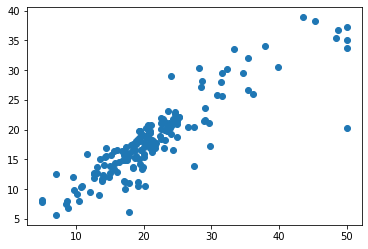

In [15]:
plt.scatter(Y_test,predictValues)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictValues))
print('MSE:', metrics.mean_squared_error(Y_test, predictValues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictValues)))